## 개념 정리
### 용어 정리
- 손실함수
    - 모델이 얼마나 안 좋은지를 나타내는 기준
    - 따라서, 경사하강법을 통해 최적화해야 한다.
    - 예시
        - 이진분류) 이진 크로스엔트로피 함수
        - 다중분류) 크로스엔트로피 함수
        - 회귀) 평균 제곱 오차 손실 함수

- 경사하강법
    - 손실함수의 경사를 따라, 최적의 모델을 찾는 방법
    - 샘플을 하나씩 사용해 학습하거나(확률적 경사하강법), 여러 개를 사용해 학습하거나(미니배치 경사하강법), 한번에 전체를 사용해 학습(배치 경사하강법)할 수 있다.
    - 전체 샘플을 모두 사용했을 때는 다시한번 반복할 수 있는데, 이를 "에포크"라고 한다.

### 핵심 패키지와 함수 (sklearn)
- SGDClassifier
    - 확률적 경사 하강법을 사용한 분류 모델을 만듦
    - loss: 확률적 경사 하강법으로 최적화할 손실 함수를 지정. 기본값은 SVM을 위한 'hinge'. 로지스틱 회귀를 위해서는 'log'로 지정.
    - penalty: 규제의 종류를 지정. l1,l2 규제가 있음
    - alpha: 규제의 강도를 지정. 기본값은 0.0001.
    - max_iter: 에포크 횟수를 지정. 기본값은 1000.
    - tol: 반복을 멈출 조건. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면 알고리즘이 중단됨. tol의 매개변수값은 0.001, n_iter_no_change 매개변수 기본값은 5.

- SGDRegressor
    - 확률적 경사 하강법을 사용한 회귀 모델을 만듦
    - loss: 손실함수를 지정. 기본값은 제곱 오차를 나타내는 'squared_loss'.
    - SGDClassifier의 매개변수와 거의 동일함.

In [6]:
'''데이터 준비하기'''
# 데이터 불러오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 데이터 분리하기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(train_input)
train_scaled = SS.transform(train_input)
test_scaled = SS.transform(test_input)

In [9]:
'''SGD 학습하기'''
# 학습 진행하기
from sklearn.linear_model import SGDClassifier
SC = SGDClassifier(loss='log', max_iter=100, random_state=42)
SC.fit(train_scaled, train_target)
print(SC.score(train_scaled, train_target))
print(SC.score(test_scaled, test_target))

# 점진적 학습: 모델을 이어서 훈련하기 -> 1 Epoch를 더 실행함
SC.partial_fit(train_scaled, train_target)
print(SC.score(train_scaled, train_target))
print(SC.score(test_scaled, test_target))

0.8403361344537815
0.8
0.907563025210084
0.925


### 에포크와 과대/과소적합
- 에포크 수가 적으면, 학습이 적절하게 이루어지지 않을 가능성이 높다. 따라서, 과소적합의 가능성이 있다.
    - 과소적합: train_set.score < test_set.score
- 에포크 수가 많으면, 학습이 과도하게 이루어질 가능성이 높다. 따라서, 과대적합의 가능성이 높다.
    - 과대적합: train_set.score > test_set.score

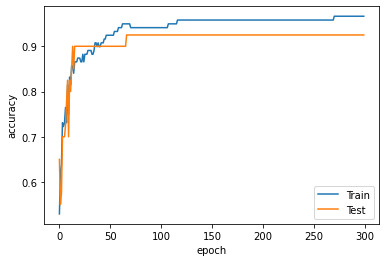

0.957983193277311
0.925


In [13]:
import numpy as np
SC = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # 배열에서 겹치지 않는 원소들만 출력

# 300번 구동하여, 각 에포크 당 점수변화를 구함
for _ in range(0,300):
    SC.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(SC.score(train_scaled, train_target))
    test_score.append(SC.score(test_scaled, test_target))

# 시각화하기
import matplotlib.pyplot as plt
plt.plot(train_score, label="Train")
plt.plot(test_score, label="Test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 반복횟수를 100으로 하고, 훈련 진행하기
SC = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # SGD는 성능이 향상되지 않으면, 자동으로 멈추는 기능이 있음. 그 기능을 tol=None을 통해 비활성화함
SC.fit(train_scaled, train_target)
print(SC.score(train_scaled, train_target))
print(SC.score(test_scaled, test_target))

In [14]:
# SGD의 기본 매개변수: hinge
SC = SGDClassifier(max_iter=100, tol=None, random_state=42) # SGD는 성능이 향상되지 않으면, 자동으로 멈추는 기능이 있음. 그 기능을 tol=None을 통해 비활성화함
SC.fit(train_scaled, train_target)
print(SC.score(train_scaled, train_target))
print(SC.score(test_scaled, test_target))

0.9495798319327731
0.925
